In [ ]:
# Import Libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [335]:
# Load dataset
df = pd.read_csv('../data/raw/exoplanet_data.csv', comment= '#')

In [336]:

df.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,AU Mic b,AU Mic,1,1,4,Transit,2020.0,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.100,4.529,0.020,-0.020,7.84038,0.000731,-0.000731,2024-09-28,2023-12,2024-09-28
1,AU Mic c,AU Mic,1,1,4,Transit,2021.0,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.100,4.529,0.020,-0.020,7.84038,0.000731,-0.000731,2024-09-28,2023-12,2024-09-28
2,BD+05 4868 A b,BD+05 4868 A,1,2,1,Transit,2025.0,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.010,7.448,0.026,-0.026,9.84152,0.000476,-0.000476,2025-03-21,2025-01,2025-03-21
3,BD-14 3065 b,BD-14 3065 A,1,3,1,Transit,2024.0,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.013,9.932,0.026,-0.026,10.91000,0.001617,-0.001617,2024-06-25,2024-03,2024-06-25
4,DS Tuc A b,DS Tuc A,1,2,1,Transit,2019.0,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-0.030,6.676,0.034,-0.034,8.31926,0.001025,-0.001025,2019-07-03,2019-07,2019-07-11


In [337]:
df.shape

(746, 92)

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          746 non-null    object 
 1   hostname         746 non-null    object 
 2   default_flag     746 non-null    int64  
 3   sy_snum          746 non-null    int64  
 4   sy_pnum          746 non-null    int64  
 5   discoverymethod  746 non-null    object 
 6   disc_year        745 non-null    float64
 7   disc_facility    746 non-null    object 
 8   soltype          746 non-null    object 
 9   pl_controv_flag  746 non-null    int64  
 10  pl_refname       746 non-null    object 
 11  pl_orbper        743 non-null    float64
 12  pl_orbpererr1    723 non-null    float64
 13  pl_orbpererr2    723 non-null    float64
 14  pl_orbperlim     743 non-null    float64
 15  pl_orbsmax       652 non-null    float64
 16  pl_orbsmaxerr1   639 non-null    float64
 17  pl_orbsmaxerr2  

In [339]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
741    False
742    False
743    False
744    False
745    False
Length: 746, dtype: bool

In [340]:
df.describe()

,default_flag,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
count,746.0,746.000000,746.000000,745.000000,746.000000,743.000000,7.230000e+02,7.230000e+02,743.0,652.000000,...,741.000000,741.000000,741.000000,741.000000,744.000000,742.000000,742.000000,744.000000,744.000000,744.000000
mean,1.0,1.121984,1.631367,2022.777181,0.004021,13.874506,1.965765e-03,-1.787445e-03,0.0,0.090386,...,-1.611606,11.524677,0.053822,-0.053822,9.039074,0.035345,-0.035345,11.131019,0.000500,-0.000500
std,0.0,0.355020,1.069169,1.783667,0.063330,30.385708,2.664913e-02,2.449135e-02,0.0,0.105419,...,3.255803,2.087233,0.102442,0.102442,1.502603,0.366202,0.366202,1.847145,0.000422,0.000422
min,1.0,1.000000,1.000000,2018.000000,0.000000,0.238182,2.800000e-08,-5.800000e-01,0.0,0.006220,...,-32.536000,5.650000,0.002000,-1.133000,4.241000,0.011000,-9.995000,5.512800,0.000112,-0.004236
25%,1.0,1.000000,1.000000,2022.000000,0.000000,3.316956,4.000000e-06,-6.000000e-05,0.0,0.038325,...,-1.568000,9.969000,0.012000,-0.057000,8.054250,0.019000,-0.023000,9.776800,0.000263,-0.000586
50%,1.0,1.000000,1.000000,2023.000000,0.000000,5.799816,1.300000e-05,-1.335500e-05,0.0,0.060000,...,-0.360100,11.446000,0.030000,-0.030000,9.045500,0.021000,-0.021000,11.176100,0.000396,-0.000396
75%,1.0,1.000000,2.000000,2024.000000,0.000000,12.832443,6.000000e-05,-3.900000e-06,0.0,0.102175,...,-0.100400,12.603000,0.057000,-0.012000,10.171250,0.023000,-0.019000,12.218975,0.000586,-0.000263
max,1.0,3.000000,6.000000,2026.000000,1.000000,482.819100,5.900000e-01,-8.700000e-08,0.0,1.152000,...,-0.002835,18.000000,1.133000,-0.002000,15.548000,9.995000,-0.011000,16.958000,0.004236,-0.000112


In [341]:
df.isnull().sum()

pl_name           0
hostname          0
default_flag      0
sy_snum           0
sy_pnum           0
                 ..
sy_gaiamagerr1    2
sy_gaiamagerr2    2
rowupdate         2
pl_pubdate        2
releasedate       2
Length: 92, dtype: int64

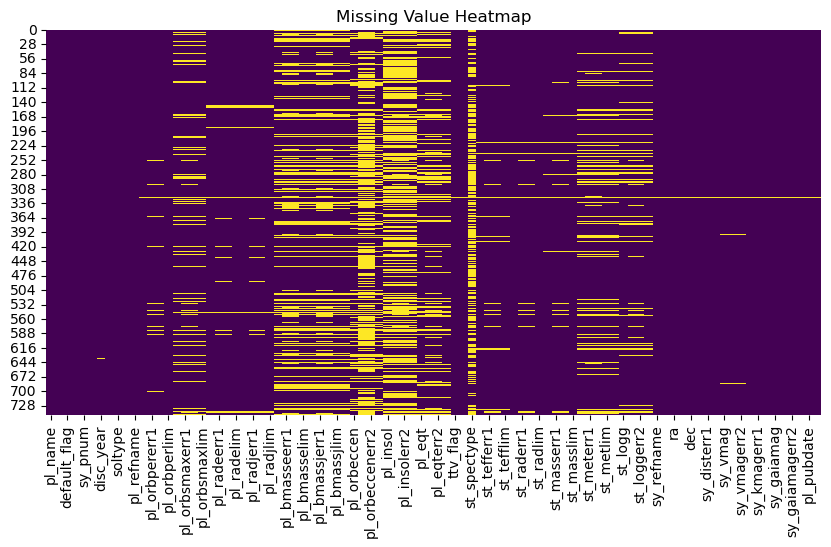

In [342]:
# DATA QUALITY ASSESSMENT

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

In [343]:
# Selecting expected features

selected_cols = ['pl_name', 'pl_rade','pl_bmasse', 'pl_orbper','pl_orbsmax','pl_eqt','st_teff','st_rad','st_mass','st_met','st_spectype',]


In [344]:
df_m1 = df[selected_cols].copy()

In [345]:

df['st_spectype'] = df['st_spectype'].fillna(df['st_spectype'].mode()[0])

# Filling Star Temp with Median
df['st_teff'] = df['st_teff'].fillna(df['st_teff'].median())

In [346]:
#HANDLE MISSING VALUES

df_m1 = df_m1.fillna(df_m1.median(numeric_only=True))
df_m1['st_spectype'] = df_m1['st_spectype'].fillna(df_m1['st_spectype'].mode()[0])

In [347]:
df_m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pl_name      746 non-null    object 
 1   pl_rade      746 non-null    float64
 2   pl_bmasse    746 non-null    float64
 3   pl_orbper    746 non-null    float64
 4   pl_orbsmax   746 non-null    float64
 5   pl_eqt       746 non-null    float64
 6   st_teff      746 non-null    float64
 7   st_rad       746 non-null    float64
 8   st_mass      746 non-null    float64
 9   st_met       746 non-null    float64
 10  st_spectype  746 non-null    object 
dtypes: float64(9), object(2)
memory usage: 64.2+ KB


In [357]:
# OUTLIER DETECTION & PHYSICAL LIMITS
# IQR Method for Outliers

Q1 = df_m1['pl_rade'].quantile(0.25)
Q3 = df_m1['pl_rade'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Capping Outliers
df_m1['pl_rade'] = df_m1['pl_rade'].clip(lower_limit, upper_limit)

#Physical Limits
df_m1 = df_m1[(df_m1['pl_rade'] > 0) & (df_m1['st_teff'] > 0) & (df_m1['pl_eqt'] > 0)]

In [ ]:
#FEATURE ENGINEERING

# 1 Star Luminosity 
# Formula: L = R^2 * (T/5778)^4

df_m1['st_lum'] = (df_m1['st_rad']**2) * ((df_m1['st_teff']/5778)**4)


# 2.Habitability Score Index (HSI)

t_score = 1 - abs(df_m1['pl_eqt'] - 288) / 288
r_score = 1 - abs(df_m1['pl_rade'] - 1)
d_score = 1 - abs(df_m1['pl_orbsmax'] - 1)

df_m1['hab_score'] = (t_score + r_score + d_score + df_m1['st_lum']) / 4

# 3. Stellar Compatibility Index (Yahan add hoga)
df_m1['stellar_comp'] = df_m1['st_mass'] / df_m1['st_rad'] / (df_m1['st_teff'] / 5778)

# 4 Orbital Stability Factor

df_m1['orbital_stability'] = df_m1['pl_orbper'] / (df_m1['pl_orbsmax']**1.5) 

# 5 Planetary Density

df_m1['pl_density'] = df_m1['pl_bmasse'] / (df_m1['pl_rade']**3)

# 6. CATEGORICAL ENCODING (One-Hot Encoding)

# Simplifying star type to main class (G, K, M, etc.)

df_m1['star_class'] = df_m1['st_spectype'].str[0]
df_m1 = pd.get_dummies(df_m1, columns=['star_class'], prefix='type')


#7 Normalization 
# Scaling

num_features = ['pl_rade','pl_bmasse','pl_density','hab_score','stellar_comp','orbital_stability']

df_m1[num_features] = MinMaxScaler().fit_transform(df_m1[num_features].fillna(0))
df_m1 = df_m1.replace([np.inf,-np.inf],0)


# 8: TARGET VARIABLE CREATION

df_m1['is_habitable'] = (df_m1['hab_score'] > 0.6).astype(int)


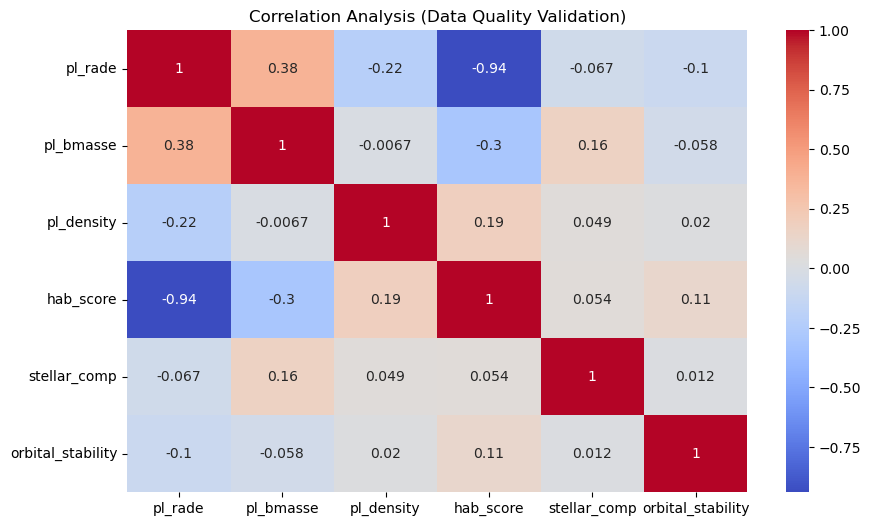

In [351]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_m1[num_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Analysis (Data Quality Validation)")
plt.show()


In [356]:
df_m1[num_features].describe()

,pl_rade,pl_bmasse,pl_density,hab_score,stellar_comp,orbital_stability
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,0.236956,0.027571,0.002155,0.342170,0.018470,0.030243
std,0.220896,0.081466,0.036857,0.095719,0.036702,0.043371
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.066997,0.001113,0.000010,0.296057,0.011483,0.021324
50%,0.111512,0.003607,0.000047,0.334647,0.016363,0.024329
75%,0.440301,0.017654,0.000168,0.370476,0.022969,0.029646
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [361]:
#FINAL EXPORT

df.to_csv("preprocessed.csv", index=False)